In [10]:
import pandas as pd
from pycaret.regression import *
import os.path as osp
from pandas_profiling import profile_report
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import dates

In [11]:
train_df = pd.read_csv('D:/download/dataset/dataset/train.csv')

test_df = pd.read_csv('D:/download/dataset/dataset/test.csv')

submission_df = pd.read_csv('D:/download/dataset/dataset/sample_submission.csv')

In [12]:
profile = train_df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
for idx in range(len(train_df)):
    old_date = train_df.loc[idx, 'Date']
    new_date = old_date.split('/')
    train_df.loc[idx, 'New_Date'] = f'{new_date[2]}-{new_date[1]}-{new_date[0]}'
    if train_df.loc[idx, 'IsHoliday'] == True:
        train_df.loc[idx, 'IsHoliday']=1
    else: train_df.loc[idx, 'IsHoliday']=0

for idx in range(len(test_df)):
    old_date = test_df.loc[idx, 'Date']
    new_date = old_date.split('/')
    test_df.loc[idx, 'New_Date'] = f'{new_date[2]}-{new_date[1]}-{new_date[0]}'
    if test_df.loc[idx, 'IsHoliday']==True:
        test_df.loc[idx, 'IsHoliday']=1
    else: test_df.loc[idx, 'IsHoliday']=0

train_df['New_Date'] = pd.to_datetime(train_df['New_Date'], format='%Y-%m-%d')
test_df['New_Date'] = pd.to_datetime(test_df['New_Date'], format='%Y-%m-%d')
train_df.drop(['Date'], inplace=True, axis=1)
test_df.drop(['Date'], inplace=True, axis=1)
train_df.head()

id  Store  Temperature  Fuel_Price  Promotion1  Promotion2  Promotion3  \
0   1      1        42.31       2.572         NaN         NaN         NaN   
1   2      1        38.51       2.548         NaN         NaN         NaN   
2   3      1        39.93       2.514         NaN         NaN         NaN   
3   4      1        46.63       2.561         NaN         NaN         NaN   
4   5      1        46.50       2.625         NaN         NaN         NaN   

   Promotion4  Promotion5  Unemployment IsHoliday  Weekly_Sales   New_Date  
0         NaN         NaN         8.106         0    1643690.90 2010-02-05  
1         NaN         NaN         8.106         1    1641957.44 2010-02-12  
2         NaN         NaN         8.106         0    1611968.17 2010-02-19  
3         NaN         NaN         8.106         0    1409727.59 2010-02-26  
4         NaN         NaN         8.106         0    1554806.68 2010-03-05

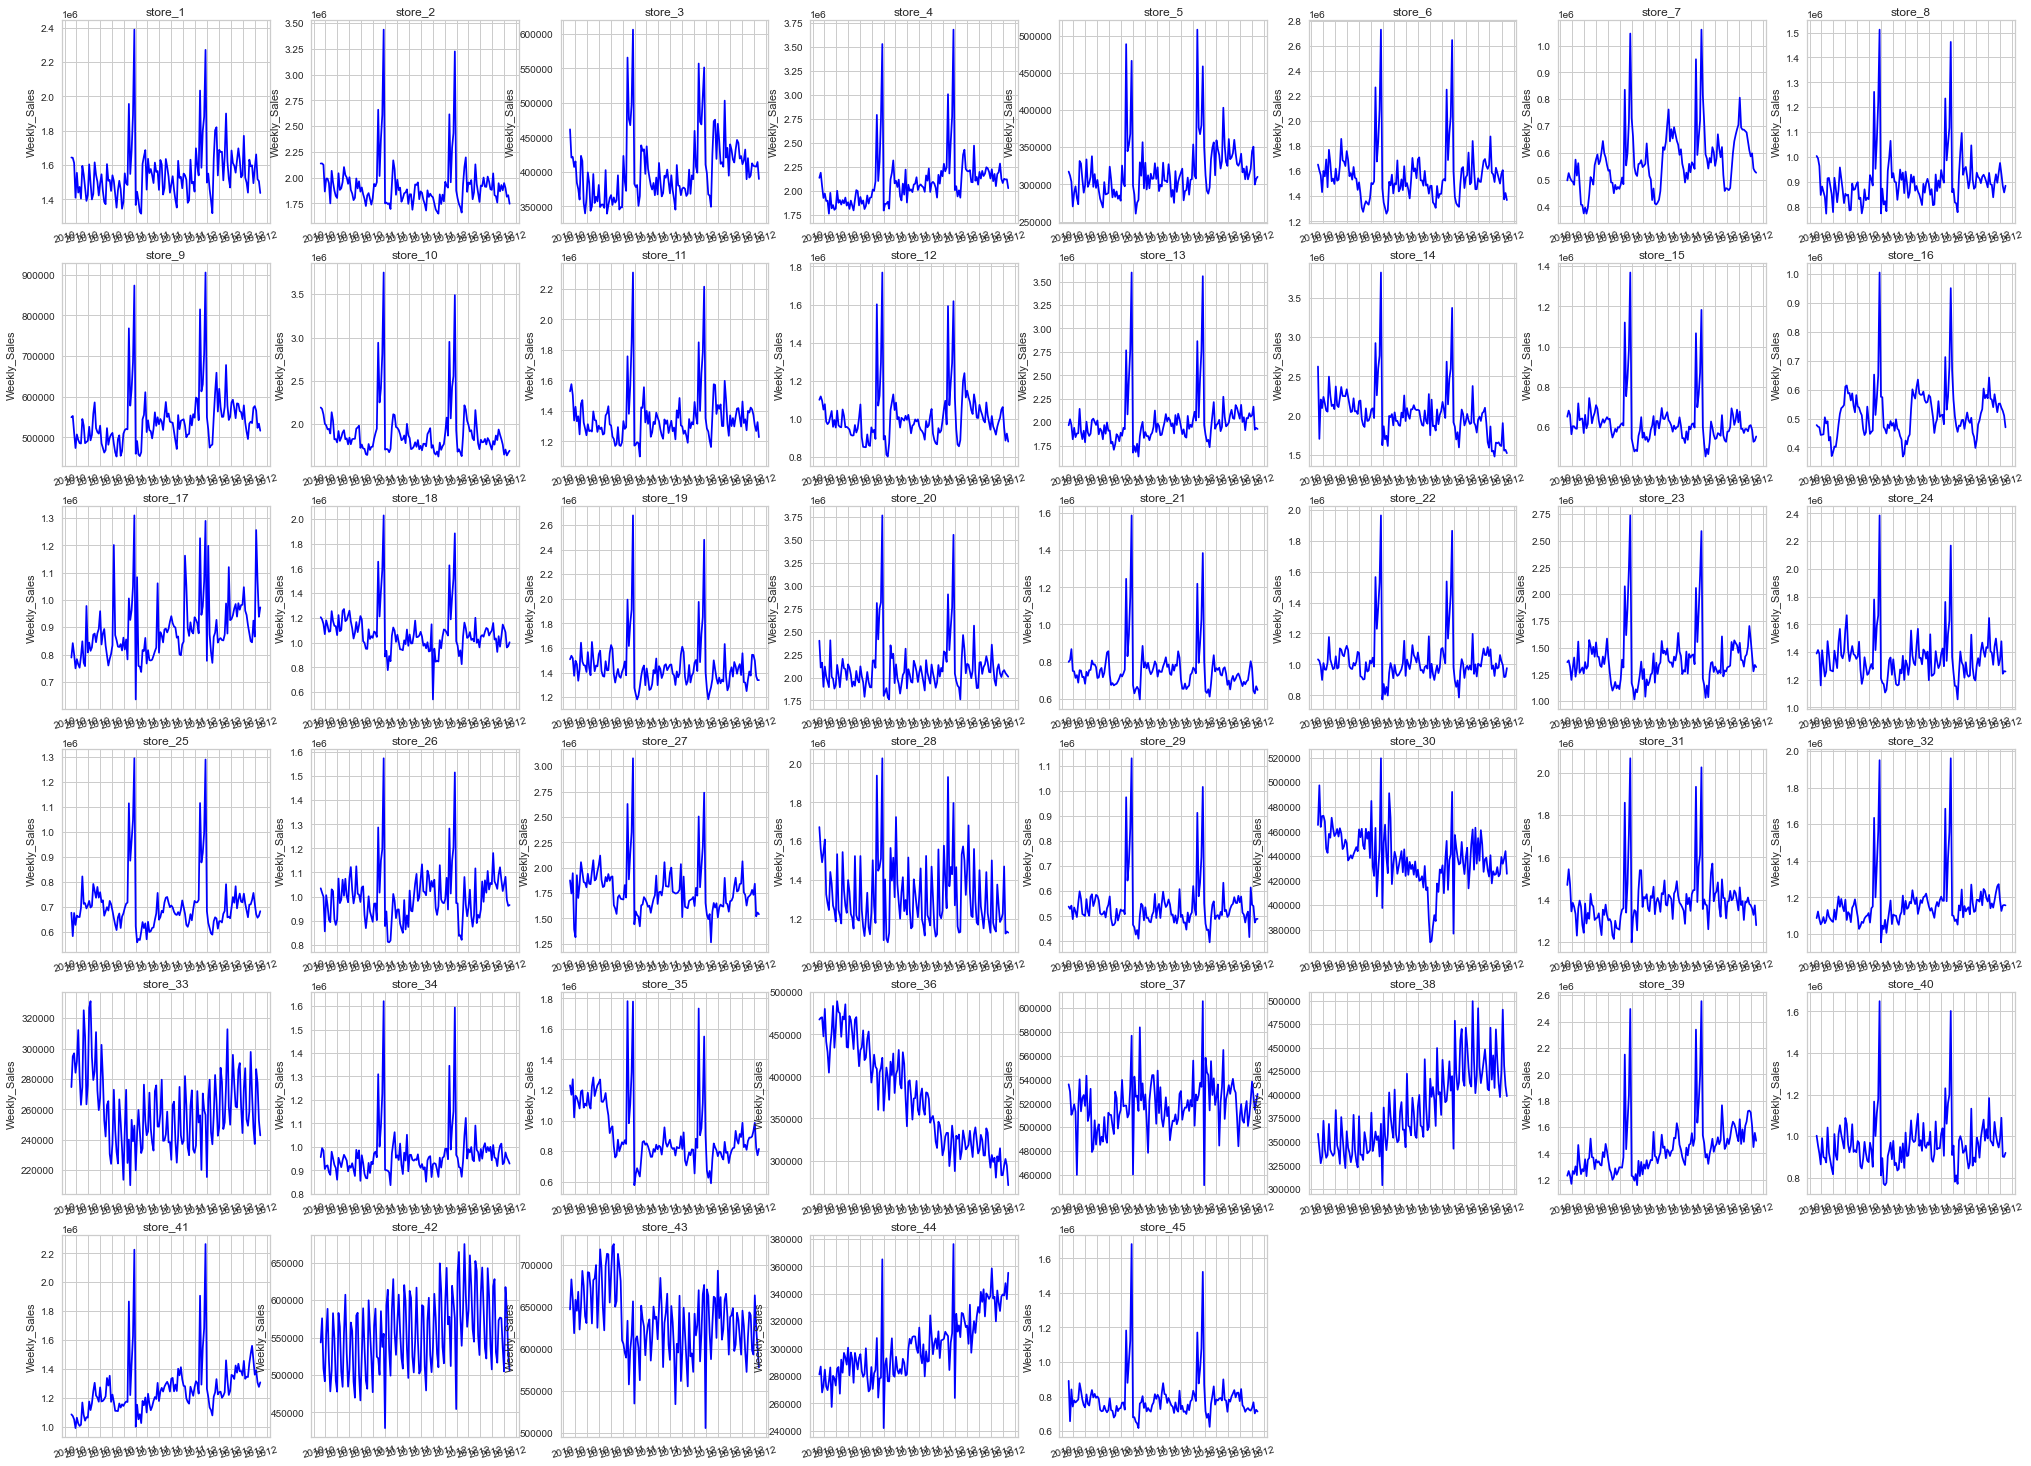

In [14]:
fig = plt.figure(figsize=(35,35)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

for i in range(1,46):
    train2 = train_df[train_df.Store == i]

    train2  = train2[["New_Date", "Weekly_Sales"]]

    ax = fig.add_subplot(8,8,i) ## 그림 뼈대(프레임) 생성


    plt.title("store_{}".format(i))
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
    ax.plot(train2["New_Date"], train2["Weekly_Sales"],marker='',label='train', color="blue")

plt.show()

In [15]:
# train_df.groupby(by='New_Date').value_counts().sort_index(level=0)

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [16]:
for idx in range(len(train_df)):
    for promo in range(5):
        if train_df.loc[idx, 'New_Date'] < datetime.strptime('2011-11-11', '%Y-%m-%d').date():
            train_df.loc[idx, f'Promotion{promo+1}'] = 0

for idx in range(len(test_df)):
    for promo in range(5):
        if test_df.loc[idx, 'New_Date'] < datetime.strptime('2011-11-11', '%Y-%m-%d').date():
            test_df.loc[idx, f'Promotion{promo+1}'] = 0

display(train_df)
display(test_df)

id  Store  Temperature  Fuel_Price  Promotion1  Promotion2  \
0        1      1        42.31       2.572        0.00        0.00   
1        2      1        38.51       2.548        0.00        0.00   
2        3      1        39.93       2.514        0.00        0.00   
3        4      1        46.63       2.561        0.00        0.00   
4        5      1        46.50       2.625        0.00        0.00   
...    ...    ...          ...         ...         ...         ...   
6250  6251     45        75.09       3.867    23641.30        6.00   
6251  6252     45        75.70       3.911    11024.45       12.80   
6252  6253     45        67.87       3.948    11407.95         NaN   
6253  6254     45        65.32       4.038     8452.20       92.28   
6254  6255     45        64.88       3.997     4556.61       20.64   

      Promotion3  Promotion4  Promotion5  Unemployment IsHoliday  \
0           0.00        0.00        0.00         8.106         0   
1           0.00        0.00        0.00         8.106         1   
2           0.00        0.00        0.00         8.106         0   
3           0.00        0.00        0.00         8.106         0   
4           0.00        0.00        0.00         8.106         0   
...          ...         ...         ...           ...       ...   
6250       92.93     6988.31     3992.13         8.684         0   
6251       52.63     1854.77     2055.70         8.684         1   
6252        4.30     3421.72     5268.92         8.684         0   
6253       63.24     2376.38     8670.40         8.684         0   
6254        1.50     1601.01     3288.25         8.684         0   

      Weekly_Sales   New_Date  
0       1643690.90 2010-02-05  
1       1641957.44 2010-02-12  
2       1611968.17 2010-02-19  
3       1409727.59 2010-02-26  
4       1554806.68 2010-03-05  
...            ...        ...  
6250     734297.87 2012-08-31  
6251     766512.66 2012-09-07  
6252     702238.27 2012-09-14  
6253     723086.20 2012-09-21  
6254     713173.95 2012-09-28  

[6255 rows x 13 columns]

id  Store  Temperature  Fuel_Price  Promotion1  Promotion2  Promotion3  \
0      1      1        68.55       3.617     8077.89         NaN       18.22   
1      2      1        62.99       3.601     2086.18         NaN        8.11   
2      3      1        67.97       3.594      950.33         NaN        4.93   
3      4      1        69.16       3.506     2585.85       31.75        6.00   
4      5      2        70.27       3.617     6037.76         NaN       10.04   
5      6      2        60.97       3.601     2145.50         NaN       33.31   
6      7      2        68.08       3.594     4461.89         NaN        1.14   
7      8      2        69.79       3.506     6152.59      129.77      200.00   
8      9      3        72.74       3.617     1750.80         NaN        3.01   
9     10      3        70.31       3.601      775.31         NaN        2.78   
10    11      3        73.44       3.594      629.25         NaN        7.50   
11    12      3        74.66       3.506      370.99        6.35        4.00   
12    13      4        63.07       3.620     5918.34         NaN      126.57   
13    14      4        57.11       3.603     4975.39         NaN       61.17   
14    15      4        64.46       3.610     6313.84         NaN       15.05   
15    16      4        63.64       3.514     1763.13       88.76       66.76   
16    17      5        71.17       3.617     2048.94         NaN        6.02   
17    18      5        66.24       3.601     1355.87         NaN        4.00   
18    19      5        69.17       3.594      908.91         NaN         NaN   
19    20      5        71.70       3.506     1547.61        1.74         NaN   
20    21      6        70.84       3.617     9663.09         NaN       40.93   
21    22      6        65.43       3.601     1905.34         NaN       13.83   
22    23      6        69.68       3.594     1476.45         NaN        3.10   
23    24      6        72.34       3.506     6827.59       53.07         NaN   
24    25      7        48.43       3.779     2955.56         NaN        9.90   
25    26      7        41.43       3.760      302.62         NaN        3.72   
26    27      7        43.01       3.750     2034.63         NaN        0.50   
27    28      7        42.53       3.686     2818.42       24.03        2.97   
28    29      8        61.41       3.617     3709.42         NaN       20.04   
29    30      8        55.03       3.601      757.39         NaN        7.50   
30    31      8        62.99       3.594     1260.59         NaN        6.50   
31    32      8        64.74       3.506     2679.05       20.38        6.00   
32    33      9        66.61       3.617     2657.57         NaN        3.01   
33    34      9        60.09       3.601      520.41         NaN        6.01   
34    35      9        68.01       3.594      545.72         NaN        8.00   
35    36      9        69.52       3.506      512.23        3.00        8.00   
36    37     10        80.88       4.132     8975.95         NaN       46.24   
37    38     10        76.03       4.468     2674.51         NaN       10.32   
38    39     10        72.71       4.449     3067.64         NaN       53.60   
39    40     10        70.50       4.301     9657.93       63.30      100.00   
40    41     11        73.37       3.617     5635.10         NaN       27.94   
41    42     11        69.94       3.601     2345.03         NaN       22.95   
42    43     11        73.77       3.594     2344.65         NaN      153.97   
43    44     11        74.26       3.506     4115.64      147.27      153.00   
44    45     12        81.61       3.966     8953.66         NaN       44.83   
45    46     12        71.74       4.468     1986.92         NaN       16.75   
46    47     12        68.66       4.449     1810.87         NaN        8.48   
47    48     12        65.95       4.301    13749.10      104.54       56.00   
48    49     13        61.79       3.815     6607.14         NaN       50.60   
49    

### BaseLine

- id 칼럼은 각 행의 고유한 id를 나타냅니다. 총 6,255 개의 훈련용 데이터가 있네요.
- Store는 쇼핑몰 지점 정보입니다. 1에서 45 까지의 지점이 있는듯 합니다.
- Date는 주 단위(Weekly) 날짜입니다.2010년 2월 5일부터 2012년 9월 28일까지 있는 것 같네요.
- Temperature는 쇼핑몰 주변 기온입니다. 아무래도 화씨(F)로 표현된 것 같습니다.
- Fuel_Price는 쇼핑몰 주변 연료 가격입니다. 2년 사이에 1.6배나 올랐네요.
- Promotion은 쇼핑몰의 비식별화된 프로모션 정보입니다. 잘 모르겠지만 nan 값들이 많이 보이네요.
- Unemployment는 실업률 정보입니다. 아무래도 실업률이 높아지면 소비가 위축되지 않을까 싶네요.
- IsHoliday는 공휴일 정보입니다. 휴일이면 쇼핑하러 갈 시간이 더 많아지지 않을까요?
- Weekly_Sales는 주간 매출액으로 이번 대회의 목표 예측값입니다. 지점별로 차이가 큰 모습을 보이네요.

In [17]:
train_df.isnull().sum()

id                0
Store             0
Temperature       0
Fuel_Price        0
Promotion1       13
Promotion2      523
Promotion3      230
Promotion4      296
Promotion5        0
Unemployment      0
IsHoliday         0
Weekly_Sales      0
New_Date          0
dtype: int64

In [18]:
for idx in range(5):
    train_df[f'Promotion{idx+1}'] = train_df[f'Promotion{idx+1}'].fillna(train_df.groupby('Store')[f'Promotion{idx+1}'].transform('mean'))

train_df.isnull().sum()

id              0
Store           0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
New_Date        0
dtype: int64

In [19]:
dacon_reg = setup(train_df, target='Weekly_Sales', train_size=0.7,
                  normalize=True, silent=True, fold_shuffle=True,
                  fold=10, remove_multicollinearity=True,
                  combine_rare_levels=True, ignore_low_variance=True)

In [20]:
best_5 = compare_models(sort = 'RMSE', n_select=5)

In [ ]:
# lgb = create_model('lightgbm', cross_validation=False)
# rf = create_model('rf', cross_validation=False)
# et = create_model('et', cross_validation=False)

In [ ]:
# tuned_lgb = tune_model(lgb, optimize='RMSE', n_iter=10)
# tuned_rf = tune_model(rf, optimize='RMSE', n_iter=10)
# tuned_et = tune_model(et, optimize='RMSE', n_iter=10)

In [ ]:
# blender_specific = blend_models(estimator_list = [tuned_lgb,tuned_rf,tuned_et], optimize = 'RMSE')

In [21]:
# pred = predict_model(blender_specific, data=test_df)
# pred
stack = stack_models(best_5[:4], optimize='RMSE')
pred = predict_model(stack, data=test_df)

In [22]:
submission_df['Weekly_Sales'] = pred['Label']
submission_df

id  Weekly_Sales
0      1  1.614141e+06
1      2  1.514567e+06
2      3  1.511949e+06
3      4  1.512184e+06
4      5  1.855192e+06
..   ...           ...
175  176  3.998102e+05
176  177  7.498592e+05
177  178  8.097077e+05
178  179  7.251821e+05
179  180  7.463011e+05

[180 rows x 2 columns]

In [23]:
submission_df.to_csv('/disk1/dataset/submission_5.csv', index=False)